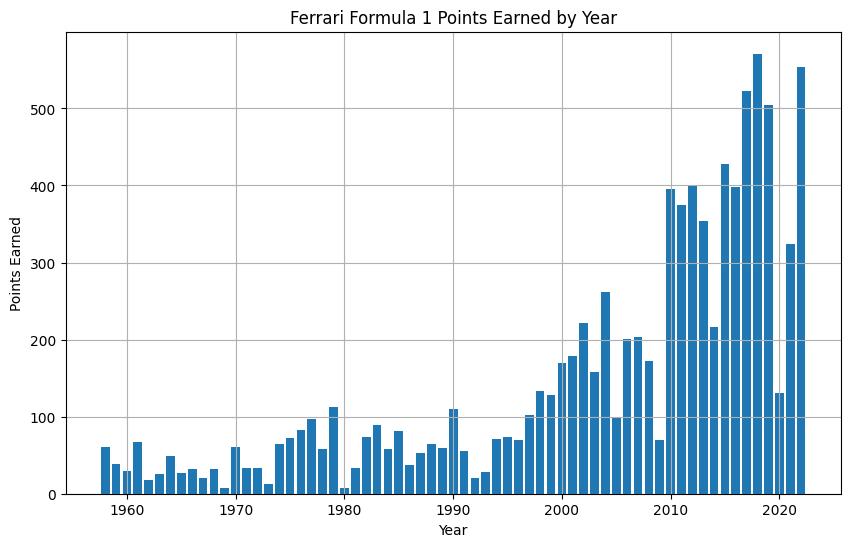

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data from CSV files
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

# Filter the constructors DataFrame to get Ferrari's constructorId
ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

# Merge constructor_results and constructor_standings based on constructorId and raceId
merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

# Merge merged_data with races based on raceId
merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

# Filter the merged_data for Ferrari only
ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

# Group the Ferrari data by year and sum the points earned
ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

# Visualization: Bar plot of Ferrari's points over the years
plt.figure(figsize=(10, 6))
plt.bar(ferrari_points_by_year['year'], ferrari_points_by_year['points_x'])
plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Ferrari Formula 1 Points Earned by Year')
plt.grid(True)
plt.show()


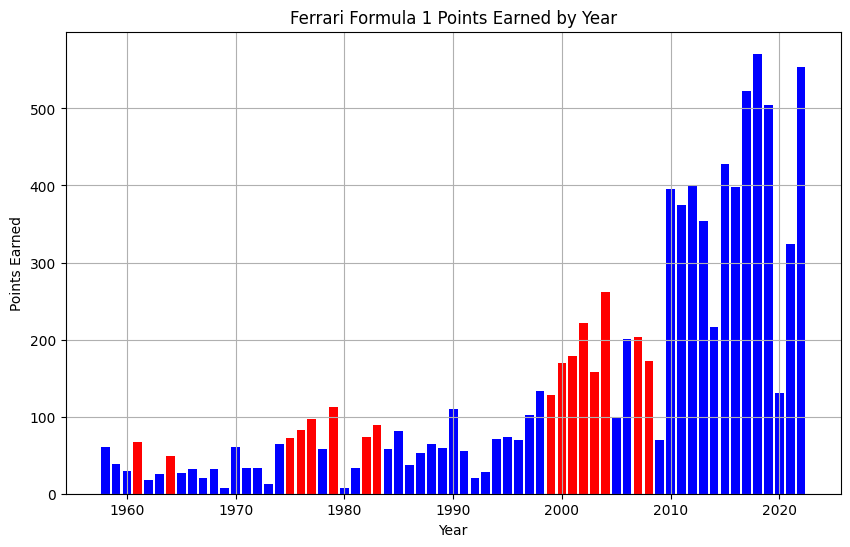

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Ferrari data
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

# Filter the constructors DataFrame to get Ferrari's constructorId
ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

# Merge constructor_results and constructor_standings based on constructorId and raceId
merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

# Merge merged_data with races based on raceId
merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

# Filter the merged_data for Ferrari only
ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

# Group the Ferrari data by year and sum the points earned
ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

# Define the years to highlight in red
highlight_years = [1961, 1964, 1975, 1976, 1977, 1979, 1982, 1983, 1999, 2000, 2001, 2002, 2003, 2004, 2007, 2008]

# Plot the points earned by year, highlighting specific years in red
plt.figure(figsize=(10, 6))

# Iterate through the years and set the bar color accordingly
for i, year in enumerate(ferrari_points_by_year['year']):
    points = ferrari_points_by_year.loc[i, 'points_x']
    bar_color = 'red' if year in highlight_years and points > 0 else 'blue'
    plt.bar(year, points, color=bar_color)

plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Ferrari Formula 1 Points Earned by Year')
plt.grid(True)
plt.show()


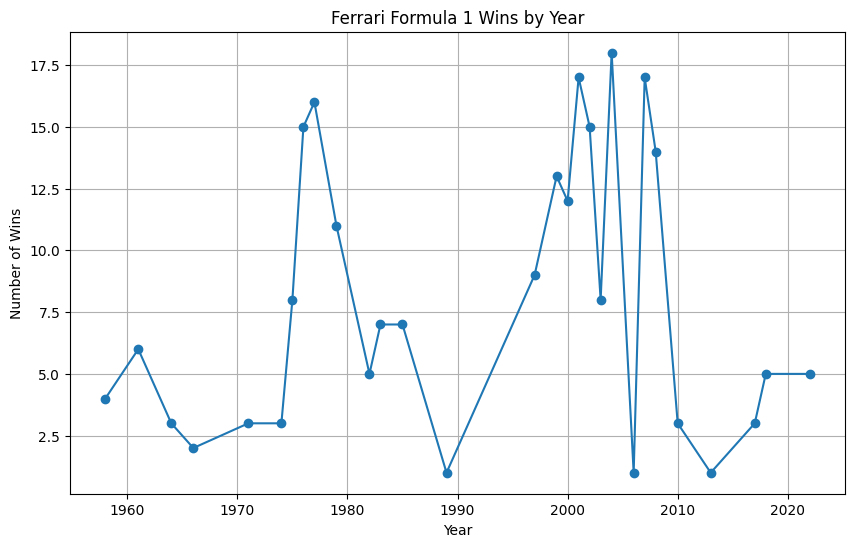

In [7]:
# Group the Ferrari data by year and count the number of wins
ferrari_wins_by_year = ferrari_data[ferrari_data['positionText'] == '1']['year'].value_counts().sort_index()

# Plot the number of wins by Ferrari each year
plt.figure(figsize=(10, 6))
plt.plot(ferrari_wins_by_year.index, ferrari_wins_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Ferrari Formula 1 Wins by Year')
plt.grid(True)
plt.show()


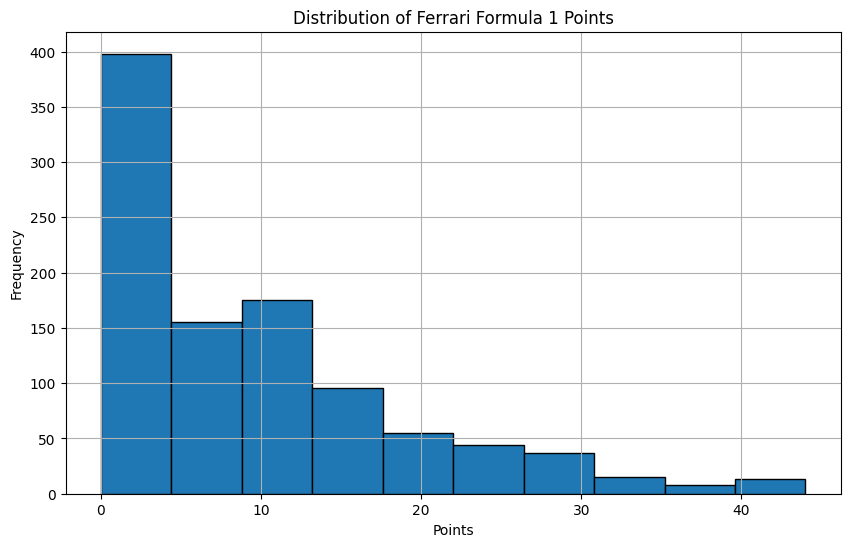

In [8]:
# Plot a histogram of points distribution for Ferrari
plt.figure(figsize=(10, 6))
plt.hist(ferrari_data['points_x'], bins=10, edgecolor='black')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Ferrari Formula 1 Points')
plt.grid(True)
plt.show()


Mean Squared Error: 18723.715173974695
Year: 2023, Predicted Points: 305.65191713747663
Year: 2024, Predicted Points: 310.99859133710015
Year: 2025, Predicted Points: 316.3452655367237
Year: 2026, Predicted Points: 321.6919397363472
Year: 2027, Predicted Points: 327.0386139359707
Year: 2028, Predicted Points: 332.38528813559424
Year: 2029, Predicted Points: 337.73196233521776
Year: 2030, Predicted Points: 343.0786365348413
Year: 2031, Predicted Points: 348.4253107344648
Year: 2032, Predicted Points: 353.7719849340883
Year: 2033, Predicted Points: 359.11865913371
Year: 2034, Predicted Points: 364.46533333333355
Year: 2035, Predicted Points: 369.81200753295707
Year: 2036, Predicted Points: 375.1586817325806
Year: 2037, Predicted Points: 380.5053559322041
Year: 2038, Predicted Points: 385.85203013182763
Year: 2039, Predicted Points: 391.19870433145115
Year: 2040, Predicted Points: 396.5453785310747
Year: 2041, Predicted Points: 401.8920527306982
Year: 2042, Predicted Points: 407.238726930

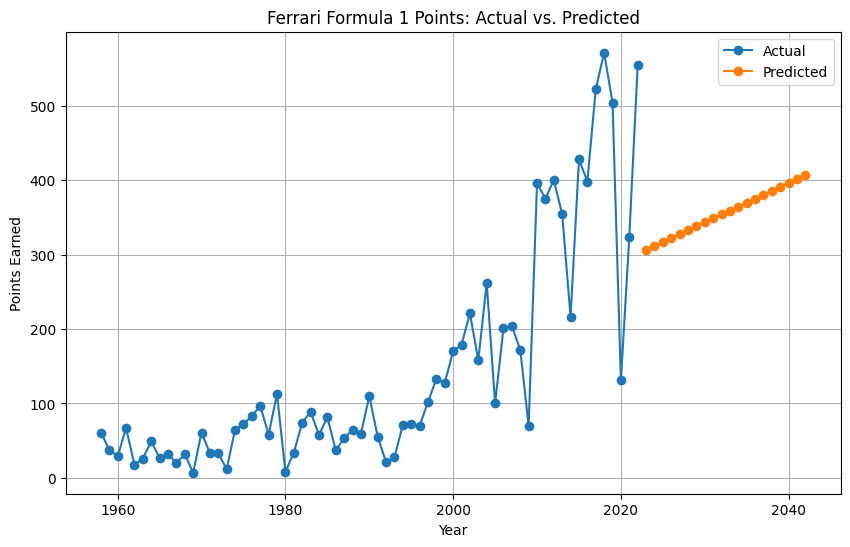

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Ferrari data
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

# Filter the constructors DataFrame to get Ferrari's constructorId
ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

# Merge constructor_results and constructor_standings based on constructorId and raceId
merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

# Merge merged_data with races based on raceId
merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

# Filter the merged_data for Ferrari only
ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

# Group the Ferrari data by year and sum the points earned
ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

# Split the data into features (year) and target (points)
X = ferrari_points_by_year['year'].values.reshape(-1, 1)
y = ferrari_points_by_year['points_x'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Now, you can use the trained model to make predictions for future years
future_years = range(2023, 2043)
future_years = [[year] for year in future_years]
future_predictions = model.predict(future_years)

# Print the future year predictions
for year, prediction in zip(future_years, future_predictions):
    print(f"Year: {year[0]}, Predicted Points: {prediction}")

    #add plots


plt.figure(figsize=(10, 6))
plt.plot(ferrari_points_by_year['year'], ferrari_points_by_year['points_x'], marker='o', label='Actual')
plt.plot(future_years, future_predictions, marker='o', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Ferrari Formula 1 Points: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()
